# TSF Task 7: Stock Market Prediction using Numerical and Textual Analysis

## Made By: Akhil Khanna GRIP APRIL '21

#### Objective: Create a hybrid model for stock price/performance prediction using numerical analysis of historical stock prices, and sentimental analysis of news headlines

In [1]:
import pandas as pd
import nltk
import matplotlib.pyplot as plt

In [2]:
df1 = pd.read_csv("C:\\Users\\Khanna\\Downloads\\Nifty50.csv")
df2 = pd.read_csv("C:\\Users\\Khanna\\Downloads\\india-news-headlines.csv")

In [3]:
df1[:5]

,Date,Open,High,Low,Close,Adj Close,Volume
0,2016-04-11,7577.799805,7678.799805,7516.850098,7671.399902,7671.399902,179800.0
1,2016-04-12,7669.250000,7717.399902,7663.350098,7708.950195,7708.950195,163400.0
2,2016-04-13,7777.149902,7864.799805,7772.200195,7850.450195,7850.450195,220400.0
3,2016-04-18,7908.149902,7920.600098,7842.750000,7914.700195,7914.700195,184600.0
4,2016-04-20,7950.049805,7950.399902,7877.549805,7914.750000,7914.750000,205300.0


In [4]:
df2[:5]

,publish_date,headline_category,headline_text
0,20010102,unknown,Status quo will not be disturbed at Ayodhya; s...
1,20010102,unknown,Fissures in Hurriyat over Pak visit
2,20010102,unknown,America's unwanted heading for India?
3,20010102,unknown,For bigwigs; it is destination Goa
4,20010102,unknown,Extra buses to clear tourist traffic


# Nifty Dataset

In [5]:
df1

,Date,Open,High,Low,Close,Adj Close,Volume
0,2016-04-11,7577.799805,7678.799805,7516.850098,7671.399902,7671.399902,179800.0
1,2016-04-12,7669.250000,7717.399902,7663.350098,7708.950195,7708.950195,163400.0
2,2016-04-13,7777.149902,7864.799805,7772.200195,7850.450195,7850.450195,220400.0
3,2016-04-18,7908.149902,7920.600098,7842.750000,7914.700195,7914.700195,184600.0
4,2016-04-20,7950.049805,7950.399902,7877.549805,7914.750000,7914.750000,205300.0
...,...,...,...,...,...,...,...
1229,2021-04-05,14837.700195,14849.849609,14459.500000,14637.799805,14637.799805,509700.0
1230,2021-04-06,14737.000000,14779.099609,14573.900391,14683.500000,14683.500000,475300.0
1231,2021-04-07,14716.450195,14879.799805,14649.849609,14819.049805,14819.049805,0.0
1232,2021-04-08,14875.650391,14984.150391,14821.099609,14873.799805,14873.799805,514800.0


In [6]:
df1.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1228.000000,1228.000000,1228.000000,1228.000000,1228.000000,1.228000e+03
mean,10604.865804,10655.274840,10532.724377,10594.896341,10594.896341,3.777633e+05
std,1629.480644,1633.735814,1613.697030,1624.377387,1624.377387,2.423244e+05
min,7577.799805,7678.799805,7511.100098,7610.250000,7610.250000,0.000000e+00
25%,9388.362305,9439.362793,9318.912842,9360.387451,9360.387451,1.892000e+05
50%,10652.600098,10707.174805,10588.824707,10635.149903,10635.149903,2.912000e+05
75%,11536.725342,11578.974854,11452.337402,11517.149658,11517.149658,5.464250e+05
max,15371.450195,15431.750000,15243.400391,15314.700195,15314.700195,1.811000e+06


In [7]:
df1.isnull().sum()

Date         0
Open         6
High         6
Low          6
Close        6
Adj Close    6
Volume       6
dtype: int64

In [8]:
df1.dropna()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2016-04-11,7577.799805,7678.799805,7516.850098,7671.399902,7671.399902,179800.0
1,2016-04-12,7669.250000,7717.399902,7663.350098,7708.950195,7708.950195,163400.0
2,2016-04-13,7777.149902,7864.799805,7772.200195,7850.450195,7850.450195,220400.0
3,2016-04-18,7908.149902,7920.600098,7842.750000,7914.700195,7914.700195,184600.0
4,2016-04-20,7950.049805,7950.399902,7877.549805,7914.750000,7914.750000,205300.0
...,...,...,...,...,...,...,...
1229,2021-04-05,14837.700195,14849.849609,14459.500000,14637.799805,14637.799805,509700.0
1230,2021-04-06,14737.000000,14779.099609,14573.900391,14683.500000,14683.500000,475300.0
1231,2021-04-07,14716.450195,14879.799805,14649.849609,14819.049805,14819.049805,0.0
1232,2021-04-08,14875.650391,14984.150391,14821.099609,14873.799805,14873.799805,514800.0


Text(0.5, 1.0, 'Nifty 50 Closing (April 2016-April 2021)')

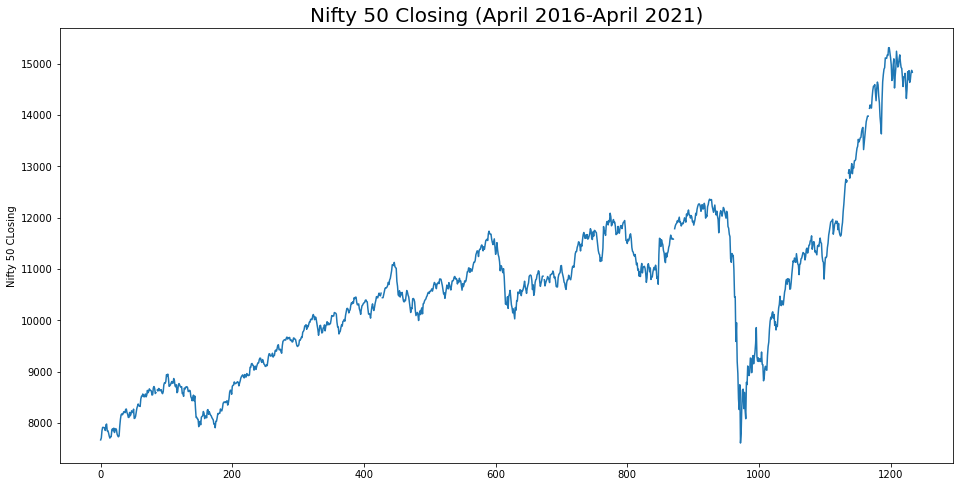

In [9]:
plt.figure(figsize=(16,8))
df1["Close"].plot()
plt.ylabel("Nifty 50 CLosing")
plt.title("Nifty 50 Closing (April 2016-April 2021)",fontsize = 20)

Text(0, 0.5, 'Volume')

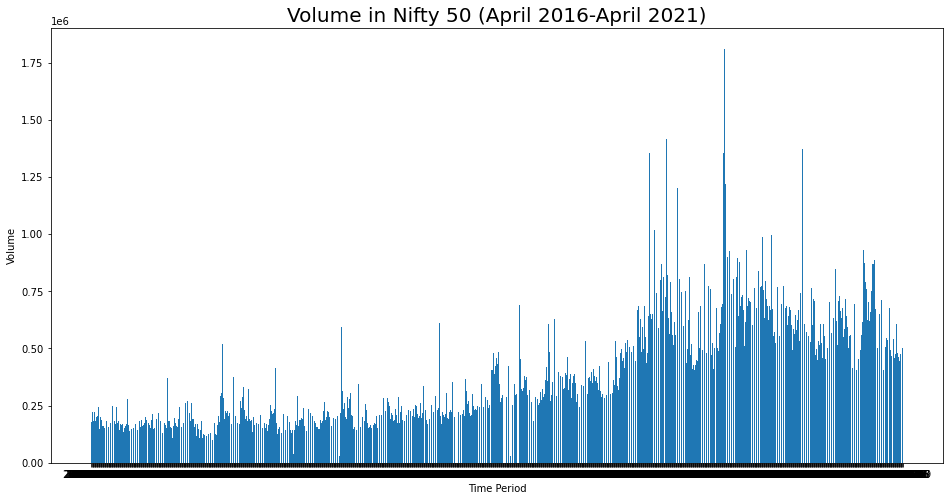

In [10]:
plt.figure(figsize=(16,8))
plt.bar(df1["Date"],df1["Volume"])
plt.title("Volume in Nifty 50 (April 2016-April 2021)",fontsize = 20)
plt.xlabel("Time Period")
plt.ylabel("Volume")

Text(0.5, 1.0, 'Nifty 50 High vs Low (April 2016-April 2021)')

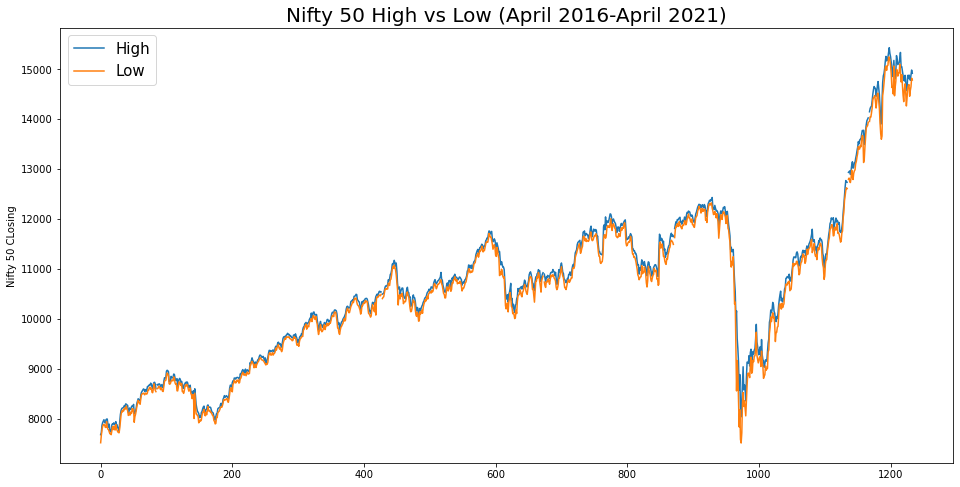

In [11]:
plt.figure(figsize=(16,8))
df1["High"].plot()
df1["Low"].plot()
plt.legend(fontsize = 15)
plt.ylabel("Nifty 50 CLosing")
plt.title("Nifty 50 High vs Low (April 2016-April 2021)",fontsize = 20)

# News Dataset

In [12]:
df2["publish_date"] = pd.to_datetime(df2["publish_date"],format='%Y%m%d')
df2[:5]

,publish_date,headline_category,headline_text
0,2001-01-02,unknown,Status quo will not be disturbed at Ayodhya; s...
1,2001-01-02,unknown,Fissures in Hurriyat over Pak visit
2,2001-01-02,unknown,America's unwanted heading for India?
3,2001-01-02,unknown,For bigwigs; it is destination Goa
4,2001-01-02,unknown,Extra buses to clear tourist traffic


In [13]:
df2 = df2.drop(["headline_category"],axis=1)

In [14]:
df2.rename(columns={"publish_date":"Date"}, inplace=True)

In [15]:
df2.replace("[^a-zA-Z']"," ",regex=True,inplace=True)
df2

,Date,headline_text
0,2001-01-02,Status quo will not be disturbed at Ayodhya s...
1,2001-01-02,Fissures in Hurriyat over Pak visit
2,2001-01-02,America's unwanted heading for India
3,2001-01-02,For bigwigs it is destination Goa
4,2001-01-02,Extra buses to clear tourist traffic
...,...,...
3424062,2020-12-31,Covid Despite dip in cases Rajasthan amon...
3424063,2020-12-31,Covid Despite dip in cases Rajasthan amon...
3424064,2020-12-31,Covid Despite dip in cases Rajasthan amon...
3424065,2020-12-31,Govt extends deadline for use of FASTag till F...


In [16]:
df2["headline_text"] = df2.groupby(["Date"]).transform(lambda x : ' '.join(x))
df2 = df2.drop_duplicates()

In [17]:
df2.reset_index(inplace=True,drop=True)
df2

,Date,headline_text
0,2001-01-02,Status quo will not be disturbed at Ayodhya s...
1,2001-01-03,Powerless north India gropes in the dark Think...
2,2001-01-04,The string that pulled Stephen Hawking to Indi...
3,2001-01-05,Light combat craft takes India into club class...
4,2001-01-06,Light combat craft takes India into club class...
...,...,...
7257,2020-12-27,BigInterview Dhritiman Chatterjee Nobody da...
7258,2020-12-28,Horoscope Today December Check astro...
7259,2020-12-29,Man recovers charred remains of 'thief' from h...
7260,2020-12-30,Numerology Readings December Predicti...


# Merge both datasets

In [18]:
df1["Date"] = pd.to_datetime(df1["Date"])

In [22]:
df = pd.merge(df1,df2, how='inner', on='Date')
df

,Date,Open,High,Low,Close,Adj Close,Volume,headline_text
0,2016-04-11,7577.799805,7678.799805,7516.850098,7671.399902,7671.399902,179800.0,yoga asanas for the office Fight age with t...
1,2016-04-12,7669.250000,7717.399902,7663.350098,7708.950195,7708.950195,163400.0,'Kapoor Sons' earns Rs crore Chakravy...
2,2016-04-13,7777.149902,7864.799805,7772.200195,7850.450195,7850.450195,220400.0,Would you change your name after marriage Don...
3,2016-04-18,7908.149902,7920.600098,7842.750000,7914.700195,7914.700195,184600.0,Internet says I'm depressed The NRI who wante...
4,2016-04-20,7950.049805,7950.399902,7877.549805,7914.750000,7914.750000,205300.0,Sunny Leone helped Nyra rehearse her scenes fo...
...,...,...,...,...,...,...,...,...
1162,2020-12-24,13672.150391,13771.750000,13626.900391,13749.250000,13749.250000,471400.0,How to set the mood for sex during cold winter...
1163,2020-12-28,13815.150391,13885.299805,13811.549805,13873.200195,13873.200195,403600.0,Horoscope Today December Check astro...
1164,2020-12-29,13910.349609,13967.599609,13859.900391,13932.599609,13932.599609,439600.0,Man recovers charred remains of 'thief' from h...
1165,2020-12-30,13980.900391,13997.000000,13864.950195,13981.950195,13981.950195,380700.0,Numerology Readings December Predicti...


# Sentimental Analysis

In [20]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

reg = SentimentIntensityAnalyzer()
reg.polarity_scores(df["headline_text"][0])
print(reg)

In [24]:
df['Compound'] = [reg.polarity_scores(i)['compound'] for i in df['headline_text']]

In [26]:
df['Negative'] = [reg.polarity_scores(i)['neg'] for i in df['headline_text']]

In [27]:
df['Neutral'] = [reg.polarity_scores(i)['neu'] for i in df['headline_text']]

In [28]:
df['Positive'] = [reg.polarity_scores(i)['pos'] for i in df['headline_text']]

In [29]:
df[:5]

,Date,Open,High,Low,Close,Adj Close,Volume,headline_text,Compound,Negative,Neutral,Positive
0,2016-04-11,7577.799805,7678.799805,7516.850098,7671.399902,7671.399902,179800.0,yoga asanas for the office Fight age with t...,-0.9998,0.150,0.740,0.109
1,2016-04-12,7669.250000,7717.399902,7663.350098,7708.950195,7708.950195,163400.0,'Kapoor Sons' earns Rs crore Chakravy...,-0.9999,0.162,0.724,0.115
2,2016-04-13,7777.149902,7864.799805,7772.200195,7850.450195,7850.450195,220400.0,Would you change your name after marriage Don...,-0.9999,0.144,0.767,0.089
3,2016-04-18,7908.149902,7920.600098,7842.750000,7914.700195,7914.700195,184600.0,Internet says I'm depressed The NRI who wante...,-0.9999,0.148,0.746,0.106
4,2016-04-20,7950.049805,7950.399902,7877.549805,7914.750000,7914.750000,205300.0,Sunny Leone helped Nyra rehearse her scenes fo...,-1.0000,0.167,0.741,0.092


In [30]:
df = df.drop(['Date', 'Open', 'High', 'Low', 'Adj Close', 'Volume', 'headline_text'], axis=1)

In [31]:
df[:5]

,Close,Compound,Negative,Neutral,Positive
0,7671.399902,-0.9998,0.150,0.740,0.109
1,7708.950195,-0.9999,0.162,0.724,0.115
2,7850.450195,-0.9999,0.144,0.767,0.089
3,7914.700195,-0.9999,0.148,0.746,0.106
4,7914.750000,-1.0000,0.167,0.741,0.092


In [32]:
from sklearn.preprocessing import MinMaxScaler
mm = MinMaxScaler()

In [33]:
df1 = pd.DataFrame(mm.fit_transform(df))
df1.columns = df.columns
df1.index = df.index
df1[:5]

,Close,Compound,Negative,Neutral,Positive
0,0.009597,0.00010,0.515873,0.276316,0.643678
1,0.015490,0.00005,0.611111,0.171053,0.712644
2,0.037698,0.00005,0.468254,0.453947,0.413793
3,0.047782,0.00005,0.500000,0.315789,0.609195
4,0.047789,0.00000,0.650794,0.282895,0.448276


In [56]:
df1 = df1.dropna()

In [57]:
df1.reset_index()

,index,Close,Compound,Negative,Neutral,Positive
0,0,0.009597,0.00010,0.515873,0.276316,0.643678
1,1,0.015490,0.00005,0.611111,0.171053,0.712644
2,2,0.037698,0.00005,0.468254,0.453947,0.413793
3,3,0.047782,0.00005,0.500000,0.315789,0.609195
4,4,0.047789,0.00000,0.650794,0.282895,0.448276
...,...,...,...,...,...,...
1157,1162,0.963479,0.00065,0.079365,0.907895,0.195402
1158,1163,0.982932,0.00010,0.452381,0.414474,0.505747
1159,1164,0.992255,0.00010,0.515873,0.342105,0.528736
1160,1165,1.000000,0.00005,0.484127,0.460526,0.379310


# Create Dataset for Model Training

In [58]:
Y = df1.Close
Y[:5]

0    0.009597
1    0.015490
2    0.037698
3    0.047782
4    0.047789
Name: Close, dtype: float64

In [59]:
X = df1.drop(["Close"],axis=1)
X[:5]

,Compound,Negative,Neutral,Positive
0,0.00010,0.515873,0.276316,0.643678
1,0.00005,0.611111,0.171053,0.712644
2,0.00005,0.468254,0.453947,0.413793
3,0.00005,0.500000,0.315789,0.609195
4,0.00000,0.650794,0.282895,0.448276


# Training the model

In [60]:
from sklearn.model_selection import train_test_split

In [61]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state=0)

In [62]:
X_train

,Compound,Negative,Neutral,Positive
304,0.00005,0.500000,0.388158,0.482759
295,0.00010,0.523810,0.236842,0.712644
1118,0.00005,0.674603,0.243421,0.482759
851,0.00005,0.587302,0.388158,0.367816
98,0.00010,0.436508,0.342105,0.655172
...,...,...,...,...
1037,0.00005,0.476190,0.559211,0.218391
766,0.00000,0.690476,0.361842,0.252874
838,0.00005,0.587302,0.289474,0.528736
561,0.00000,0.682540,0.151316,0.620690


In [63]:
Y_train

304     0.318180
295     0.317553
1118    0.672693
851     0.601088
98      0.182746
          ...   
1037    0.422470
766     0.647810
838     0.508130
561     0.522090
687     0.526013
Name: Close, Length: 929, dtype: float64

In [64]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn import svm
from sklearn.metrics import mean_squared_error

In [65]:
rf = RandomForestRegressor()
dt = DecisionTreeRegressor()
sm = svm.SVR()

In [66]:
rf.fit(X_train,Y_train)
pred = rf.predict(X_test)
rf1 = mean_squared_error(pred, Y_test)
rf1

0.038571941594371426

In [67]:
dt.fit(X_train,Y_train)
pred = dt.predict(X_test)
dt1 = mean_squared_error(pred, Y_test)
dt1

0.06169137210185271

In [68]:
sm.fit(X_train,Y_train)
pred = sm.predict(X_test)
sm1 = mean_squared_error(pred, Y_test)
sm1

0.03564226162322373

# Result:

### SVM Algorithm gives the lowest value of mean squared error. The lower the mean squared error, the better is it for the model. SVM Algorithm is the best for this dataset